## Perspective PS4

### Multiple Linear Regression 

#### a. Import data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [11]:
auto = pd.read_csv('Auto.csv', na_values = '?')
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


#### b. produce a scatterplot

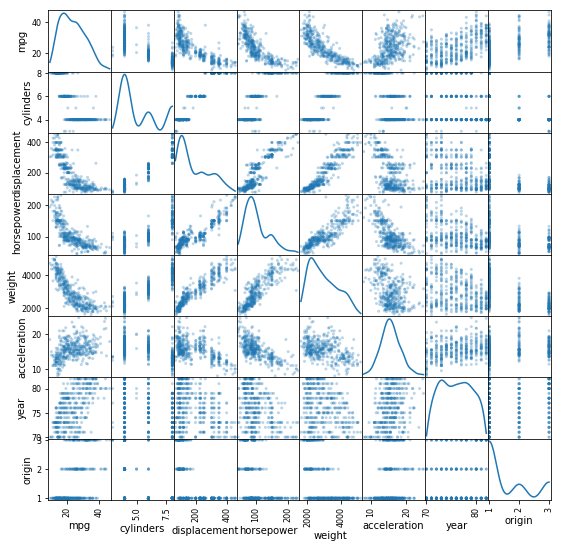

In [24]:
from pandas.plotting import scatter_matrix
%matplotlib inline
df_quant = auto[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
plt = scatter_matrix(df_quant,alpha = 0.3, figsize = (9,9), diagonal = 'kde')
# plt.title(r'Scatter Matrix Plot of Auto Data')

#### c. compute correlation matrix

In [25]:
df_quant.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


#### d. estimate linear regression model

In [75]:
import statsmodels.api as sm
X = sm.add_constant(df_quant.iloc[:,1:])
reg = sm.OLS(endog=auto['mpg'], exog= X, missing='drop').fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 30 Jan 2018   Prob (F-statistic):          2.04e-139
Time:                        20:23:05   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

The regression is:

mpg = -17.2184 - 0.4934 cylinders + 0.0199 displacement - 0.0170 horsepower - 0.0065 weight + 0.0806 acceleration + 0.7508 year + 1.4261 origin


From the table above we can see that: 
i).  Constant, displacement, weight, year and origin are statistically significant at 1% level.
ii). Cylinders, horsepower and acceleration are not significant at 10% level. 
iii). The coefficient of year is 0.7508, which indicates that the miles per gallon(mpg) is increased by 0.7508 unit per year.  

#### e). non-linear relationship  

By looling at the scatter plot at the first row in the scatter matrix plot, we can find out that variables displacement, horsepower and weight are most likely to have non-linear relationship with mpg.

#### i). estimate nonlinear relationship 

In [74]:
sqrt = pd.concat([np.sqrt(auto['displacement']),np.sqrt(auto['horsepower']), np.sqrt(auto['weight']), np.sqrt(auto['acceleration'])],axis =1)
sqrt.rename(columns={'displacement': 'displacement_sqr', 'horsepower': 'horsepower_sqr', 'weight': 'weight_sqr',
                    'acceleration': 'acceleration_sqr'}, inplace=True)
X_sqr = pd.concat([X, sqrt], axis =1)
reg_new = sm.OLS(endog=auto['mpg'], exog= X_sqr, missing='drop').fit()
print(reg_new.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     227.3
Date:                Tue, 30 Jan 2018   Prob (F-statistic):          1.40e-159
Time:                        20:23:01   Log-Likelihood:                -964.18
No. Observations:                 392   AIC:                             1952.
Df Residuals:                     380   BIC:                             2000.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              116.0780     21.549  

The new regression model is:

mpg = 116.0780- 0.0369 cylinders + 0.0038 displacement + 0.1633 horsepower + 0.0141 weight + 2.9720 acceleration + 0.7816 year + 0.6157 origin - 0.2522 displacement_sqr - 4.7121 horsepower_sqr - 1.9949 weight_sqr - 25.5257 accleration_sqr

#### iii). adjusted R-squared

In [72]:
print('adjusted R-squared:', 0.864)

adjusted R-squared: 0.864


The adjusted R-squared in part d is 0.818. Hence the model with the inclusion of these squared terms have bigger adjusted R-squared, which suggests the model fits better.

#### iv). coefficient on displacement 

The coefficient on displacement in the regression model in part d is 0.199 and significant at 1% level, however, the coefficient becomes 0.0038 and insignificant (p-vaule = 0.899) after the inclusion of the squared term. The coefficient of the squared term is -0.2522 with a p-value 0.774, which is insignificant. 

#### v). coefficient on cylinders 

The cylinders variable has a p-value equals to 0.128 in the regression from part d), and it becomes much more insignificant in the new regression model (p-value = 0.903).

#### f). Prediction 

In [93]:
x = np.array([6, 200, 100, 3100, 15.1, 1999, 1, 6**2, 200**2, 100**2, 3100**2, 15.1**2])
reg_new.predict(x)

array([-19226599.13124728])

### 2. $$p_{values} = 123$$